In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import GoH.reports
import GoH.utilities
import GoH.clean
import GoH.normalize
import re
import os
from os import listdir
from os.path import isfile, join
import collections

In [4]:
%matplotlib inline

In [5]:
wordlist_dir = "/Users/jeriwieringa/Dissertation/drafts/data/word-lists"
wordlists = ["2016-12-07-SDA-last-names.txt", 
             "2016-12-07-SDA-place-names.txt", 
             "2016-12-08-SDA-Vocabulary.txt", 
             "2017-01-03-place-names.txt", 
             "2017-02-14-Base-Word-List-SCOWL&KJV.txt",
             "2017-02-14-Roman-Numerals.txt",
             "2017-03-01-Additional-Approved-Words.txt"
            ]

In [6]:
spelling_dictionary = GoH.utilities.create_spelling_dictionary(wordlists, wordlist_dir)

In [7]:
title = "LibM"

In [8]:
base_dir = "/Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/{}/".format(title)

## Baseline

In [9]:
cycle = 'baseline'

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/LibM/baseline

Average verified rate: 0.9276951364862356

Average of error rates: 0.08840278796771826

Total token count: 1502679



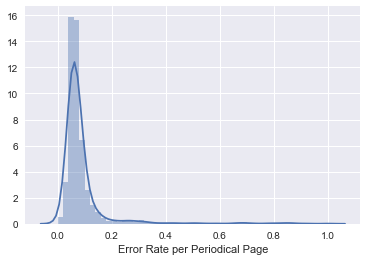

In [10]:
stats = GoH.reports.overview_report(join(base_dir, cycle), spelling_dictionary, title)

In [11]:
errors_summary = GoH.reports.get_errors_summary( stats )
GoH.reports.top_errors( errors_summary, 500 )

[('ñ', 5427),
 ('-', 1800),
 ('re-', 1618),
 ('con-', 1590),
 ("'", 1508),
 ('tion', 1443),
 ('m', 1251),
 ('d', 1242),
 ('¥', 1236),
 ('in-', 1093),
 ('w', 937),
 ('e', 925),
 (')', 906),
 ('ment', 864),
 ('t', 803),
 ('n', 748),
 ('de-', 745),
 ('be-', 695),
 ('+', 648),
 ('com-', 643),
 ('r', 626),
 ('f', 594),
 ('pro-', 571),
 ('sun-', 502)]

## Check Special Character Use

In [12]:
GoH.reports.tokens_with_special_characters(errors_summary)[:200]

[('ñ', 5427),
 ('¥', 1236),
 (')', 906),
 ('+', 648),
 ('(', 478),
 ('/', 388),
 ('=', 193),
 ('(affiliated', 173),
 ('*', 169),
 ('•', 137),
 ('ã', 134),
 ('(affil-', 132),
 ('(af-', 119),
 ('_', 99),
 ('(see', 94),
 ('¥¥', 76),
 ('%', 73),
 ('[the', 72),
 ('(or', 65),
 (']', 61),
 ('¥¥¥', 56),
 ('(the', 55),
 ('ó', 52),
 ('year)', 49),
 ('[', 49),
 ('\\', 43),
 ('newfoundland)', 43),
 ('carolina)', 43),
 ('alaska)', 42),
 ('wyoming)', 42),
 ('mexico)', 42),
 ('wisconsin)', 42),
 ('mississippi)', 42),
 ('maryland)', 42),
 ('dakota)', 42),
 ('island)', 42),
 ('arizona)', 42),
 ('(secretary', 40),
 ('(western)', 39),
 ('(affili-', 38),
 ('++', 37),
 ('o)', 36),
 ('(southern)', 35),
 ('(payable', 33),
 ('ô', 32),
 ('(continued', 31),
 ('(west)', 31),
 ('>', 30),
 ('¥¥¥¥', 30),
 ('(s', 30),
 ('(h', 29),
 ('`', 29),
 ('office)', 25),
 ('longacre)', 25),
 ('(a', 24),
 ('england)', 21),
 ('¥=', 20),
 ('(and', 19),
 ('[of', 19),
 ('[sunday]', 19),
 ('chesapeake)', 18),
 ('(which', 18),
 ('(ea

## Correction 1 -- Normalize Characters

In [13]:
# %load shared_elements/normalize_characters.py
prev = cycle
cycle = "correction1"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    # Substitute for all other dashes
    content = re.sub(r"—-—–‑", r"-", content)

    # Substitute formatted apostrophe
    content = re.sub(r"\’\’\‘\'\‛\´", r"'", content)
    
    # Replace all special characters with a space (as these tend to occur at the end of lines)
    content = re.sub(r"[^a-zA-Z0-9\s,.!?$:;\-&\'\"]", r" ", content)
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/LibM/correction1

Average verified rate: 0.9373310897970699

Average of error rates: 0.0763136463683052

Total token count: 1492287



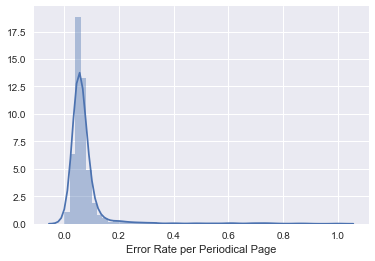

In [14]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [15]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('-', 1932),
 ('re-', 1620),
 ('con-', 1590),
 ("'", 1578),
 ('tion', 1446),
 ('m', 1334),
 ('d', 1256),
 ('in-', 1094),
 ('e', 985),
 ('w', 952),
 ('ment', 864),
 ('t', 837),
 ('n', 774),
 ('de-', 745),
 ('be-', 696),
 ('r', 663),
 ('com-', 645),
 ('f', 624),
 ('pro-', 572),
 ('sun-', 505),
 ('ex-', 450),
 ('en-', 446),
 ('tions', 404),
 ('g', 384),
 ('ligious', 367),
 ('per-', 361),
 ('dis-', 360),
 ('un-', 357),
 ('relig-', 351),
 ('na-', 328),
 ('gov-', 324),
 ('ob-', 323),
 ('chris-', 298),
 ('govern-', 292),
 ('x', 265),
 ('ernment', 260),
 ('ious', 258),
 ('ac-', 250),
 ('erty', 237),
 ('ance', 236),
 ('lib-', 236),
 ('pre-', 235),
 ('sab-', 234),
 ('ments', 233),
 ('ad-', 230),
 ('reli-', 219),
 ('tional', 211),
 ('ligion', 209),
 ('u', 206),
 ('im-', 206)]

## Correction 2 -- Fix Line Endings

In [16]:
# %load shared_elements/correct_line_endings.py
prev = cycle
cycle = "correction2"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    content = re.sub(r"(\w+)(\-\s{1,})([a-z]+)", r"\1\3", content)

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/LibM/correction2

Average verified rate: 0.9784327331755492

Average of error rates: 0.037992296404988996

Total token count: 1452618



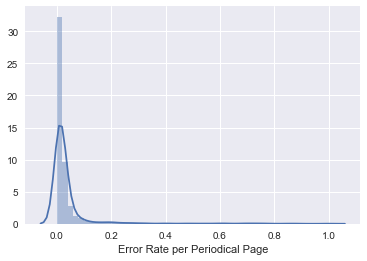

In [17]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [18]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[('-', 1918),
 ("'", 1578),
 ('m', 1330),
 ('d', 1250),
 ('e', 976),
 ('w', 951),
 ('t', 819),
 ('n', 772),
 ('r', 662),
 ('f', 620),
 ('g', 381),
 ('x', 265),
 ('u', 205),
 ('k', 188),
 ('tv', 150),
 ('th', 118),
 ('sunday-law', 112),
 ('--', 111),
 ('postmaster-general', 106),
 ('pa', 101),
 ('sunday-closing', 73),
 ('z', 72),
 ('un-american', 72),
 ('id', 71),
 ('io', 70),
 ('statute-books', 66),
 ('post-offices', 66),
 ('co', 61),
 ('church-and-state', 60),
 ('mo', 60),
 ('ga', 58),
 ('va', 56),
 ('attorney-general', 56),
 ('ex', 51),
 ('re', 48),
 ('sunday-rest', 48),
 ('tion', 45),
 ('mm', 42),
 ('q', 41),
 ('mt', 41),
 ('wm', 38),
 ('pp', 38),
 ('re-', 38),
 ('ro', 37),
 ('charta', 37),
 ('mi', 36),
 ('li', 36),
 ('---', 36),
 ('present-day', 35),
 ('religio-political', 33)]

## Correction 3 -- Remove extra dashes

In [19]:
# %load shared_elements/remove_extra_dashes.py
prev = cycle
cycle = "correction3"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    
    replacements = []
    for token in tokens:
        if token[0] is "-":
            replacements.append((token, token[1:]))
            
        elif token[-1] is "-":
            replacements.append((token, token[:-1]))
        else:
            pass
        
    if len(replacements) > 0:
        print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

LibM19060401-V01-01-page1.txt: [('support.-', 'support.')]
LibM19060401-V01-01-page10.txt: [('sanc-', 'sanc')]
LibM19060401-V01-01-page11.txt: [('Mc-', 'Mc'), ('Mc-', 'Mc')]
LibM19060401-V01-01-page12.txt: [('organiza-', 'organiza')]
LibM19060401-V01-01-page14.txt: [('altogether."-', 'altogether."')]
LibM19060401-V01-01-page15.txt: [('-the', 'the')]
LibM19060401-V01-01-page17.txt: [('-II.', 'II.'), ('de-', 'de')]
LibM19060401-V01-01-page19.txt: [('-haracterized', 'haracterized')]
LibM19060401-V01-01-page21.txt: [('pe-', 'pe')]
LibM19060401-V01-01-page27.txt: [('-', '')]
LibM19060401-V01-01-page31.txt: [('-', '')]
LibM19060401-V01-01-page32.txt: [('-', '')]
LibM19060401-V01-01-page34.txt: [('-never', 'never'), ('-', ''), ('-', ''), ('-', ''), ('prin-', 'prin')]
LibM19060401-V01-01-page35.txt: [('-', ''), ('-', ''), ('-', ''), ('-gh-l-', 'gh-l-'), ('ner-', 'ner'), ('-', ''), ('-', ''), ('--afilhir', '-afilhir'), ('--', '-'), ('-', ''), ('-', ''), ('-iSW', 'iSW'), ('-', ''), ('-cirm', 'ci

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/LibM/correction3

Average verified rate: 0.9808327456835285

Average of error rates: 0.03449303008070433

Total token count: 1452112



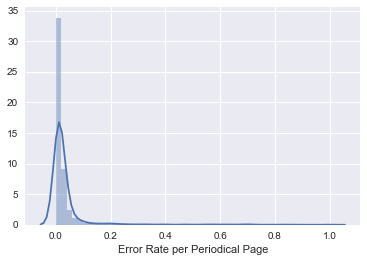

In [20]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [21]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[("'", 1601),
 ('m', 1336),
 ('d', 1255),
 ('e', 1005),
 ('w', 956),
 ('t', 838),
 ('n', 784),
 ('r', 684),
 ('f', 634),
 ('g', 385),
 ('x', 271),
 ('u', 208),
 ('k', 192),
 ('tv', 150),
 ('th', 121),
 ('pa', 104),
 ('sunday-law', 92),
 ('re', 89),
 ('z', 82),
 ('ex', 77),
 ('co', 74),
 ('io', 72),
 ('id', 71),
 ('postmaster-general', 62),
 ('mo', 62),
 ('ga', 58),
 ('post-offices', 57),
 ('un', 57),
 ('un-american', 57),
 ('va', 56),
 ('statute-books', 56),
 ('sunday-closing', 54),
 ('church-and-state', 49),
 ('tion', 45),
 ('mm', 45),
 ('q', 44),
 ('li', 43),
 ('mt', 42),
 ('attorney-general', 41),
 ('sunday-rest', 39),
 ('wm', 38),
 ('pp', 38),
 ('mi', 37),
 ('charta', 37),
 ('ro', 37),
 ('mc', 33),
 ('ri', 31),
 ('neander', 31),
 ('al', 31),
 ('-', 30)]

## Correction 4 -- Remove extra quotation marks

In [22]:
# %load shared_elements/replace_extra_quotation_marks.py
prev = cycle
cycle = "correction4"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    
    corrections = []
    for token in tokens:
        token_list = list(token)
        last_char = token_list[-1]

        if last_char is "'":
            if len(token) > 1:
                if token_list[-2] is 's' or 'S':
                    pass
                else:
                    corrections.append((token, re.sub(r"'", r"", token)))
            else:
                pass
        elif token[0] is "'":
            corrections.append((token, re.sub(r"'", r"", token)))   
        else:
            pass
    
    if len(corrections) > 0:
        print('{}: {}'.format(filename, corrections))

        for correction in corrections:
            content = GoH.clean.replace_pair(correction, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

LibM19060401-V01-01-page20.txt: [("'bound", 'bound')]
LibM19060401-V01-01-page22.txt: [("'co", 'co')]
LibM19060401-V01-01-page25.txt: [("'brought", 'brought')]
LibM19060401-V01-01-page29.txt: [("'Sunday", 'Sunday'), ("'hundred", 'hundred')]
LibM19060401-V01-01-page31.txt: [("'Concerning", 'Concerning'), ("'Connecticut", 'Connecticut'), ("'hearkened", 'hearkened'), ("'brother", 'brother'), ("'bow", 'bow')]
LibM19060401-V01-01-page33.txt: [("'CORTELYOU", 'CORTELYOU')]
LibM19060401-V01-01-page34.txt: [("'advocate", 'advocate'), ("'and", 'and'), ("'contrast", 'contrast')]
LibM19060401-V01-01-page35.txt: [("'e", 'e')]
LibM19060401-V01-01-page7.txt: [("'belief", 'belief')]
LibM19060401-V01-01-page8.txt: [("'Caesar", 'Caesar')]
LibM19060401-V01-01-page9.txt: [("'by", 'by')]
LibM19060701-V01-02-page21.txt: [("'twixt", 'twixt')]
LibM19061001-V01-03-page18.txt: [("'corresponding", 'corresponding')]
LibM19061001-V01-03-page22.txt: [('\'"', '"')]
LibM19061001-V01-03-page23.txt: [("'fragile", 'frag

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/LibM/correction4

Average verified rate: 0.9811434974335735

Average of error rates: 0.03407373440939106

Total token count: 1452019



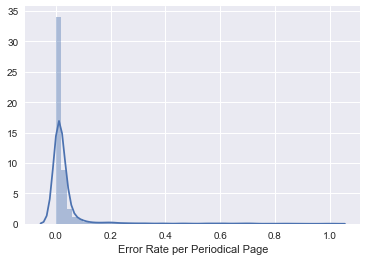

In [23]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [24]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[("'", 1499),
 ('m', 1341),
 ('d', 1257),
 ('e', 1013),
 ('w', 957),
 ('t', 847),
 ('n', 787),
 ('r', 687),
 ('f', 634),
 ('g', 386),
 ('x', 271),
 ('u', 209),
 ('k', 192),
 ('tv', 150),
 ('th', 122),
 ('pa', 104),
 ('sunday-law', 92),
 ('re', 89),
 ('z', 83),
 ('ex', 77),
 ('co', 75),
 ('io', 72),
 ('id', 71),
 ('mo', 63),
 ('postmaster-general', 62),
 ('ga', 58),
 ('post-offices', 57),
 ('un', 57),
 ('un-american', 57),
 ('va', 57),
 ('statute-books', 56),
 ('sunday-closing', 54),
 ('church-and-state', 49),
 ('tion', 45),
 ('mm', 45),
 ('q', 44),
 ('li', 43),
 ('mt', 42),
 ('attorney-general', 41),
 ('sunday-rest', 39),
 ('wm', 38),
 ('ro', 38),
 ('pp', 38),
 ('mi', 37),
 ('charta', 37),
 ('mc', 33),
 ('al', 32),
 ('ri', 31),
 ('neander', 31),
 ('-', 30)]

## Correction 5 -- Rejoin Burst Words

In [25]:
# %load shared_elements/rejoin_burst_words.py
prev = cycle
cycle = "correction5"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    pattern = re.compile("(\s(\w{1,2}\s){5,})")
    
    replacements = []
    GoH.clean.check_splits(pattern, spelling_dictionary, content, replacements)
    
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

LibM19061001-V01-03-page17.txt: [(' r a t h e ', 'rathe')]
LibM19061001-V01-03-page24.txt: [('To', 'To')]
LibM19100101-V05-01-page22.txt: [('It', 'It')]
LibM19100401-V05-02-page52.txt: [('El', 'El')]
LibM19100701-V05-03-page19.txt: [(' f or w a r d\n', 'forward')]
LibM19120401-V07-02-page46.txt: [('It', 'It')]
LibM19121001-V07-04-page29.txt: [('As', 'As')]
LibM19121001-V07-04-page5.txt: [('El', 'El')]
LibM19150101-V10-01-page11.txt: [('To', 'To')]
LibM19150101-V10-01-page4.txt: [('Lo', 'Lo')]
LibM19150401-V10-02-page6.txt: [('\nU N U S U A L ', 'UNUSUAL')]
LibM19150701-V10-03-page27.txt: [('It', 'It')]
LibM19150701-V10-03-page47.txt: [(' m a n is a ', 'manisa')]
LibM19170401-V12-02-page5.txt: [(' p r es en t ', 'present')]
LibM19170701-V12-03-page16.txt: [('Is', 'Is')]
LibM19200101-V14-01-page6.txt: [(' c an n o t ', 'cannot')]


Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/LibM/correction5

Average verified rate: 0.9811555435567139

Average of error rates: 0.0340564930300807

Total token count: 1451992



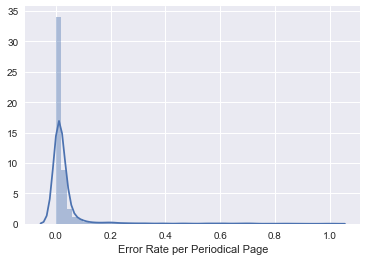

In [26]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [27]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[("'", 1499),
 ('m', 1340),
 ('d', 1256),
 ('e', 1012),
 ('w', 956),
 ('t', 844),
 ('n', 784),
 ('r', 684),
 ('f', 633),
 ('g', 386),
 ('x', 271),
 ('u', 206),
 ('k', 192),
 ('tv', 150),
 ('th', 122),
 ('pa', 104),
 ('sunday-law', 92),
 ('re', 89),
 ('z', 83),
 ('ex', 77),
 ('co', 75),
 ('io', 72),
 ('id', 71),
 ('mo', 63),
 ('postmaster-general', 62),
 ('ga', 58),
 ('post-offices', 57),
 ('un', 57),
 ('un-american', 57),
 ('va', 57),
 ('statute-books', 56),
 ('sunday-closing', 54),
 ('church-and-state', 49),
 ('tion', 45),
 ('mm', 45),
 ('q', 44),
 ('li', 43),
 ('mt', 42),
 ('attorney-general', 41),
 ('sunday-rest', 39),
 ('wm', 38),
 ('ro', 38),
 ('pp', 38),
 ('mi', 37),
 ('charta', 37),
 ('mc', 33),
 ('al', 32),
 ('ri', 31),
 ('neander', 31),
 ('-', 30)]

## Correction 6 -- Rejoin Split Words

In [28]:
# %load shared_elements/rejoin_split_words.py
prev = cycle
cycle = "correction6"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    errors = GoH.reports.identify_errors(tokens, spelling_dictionary)

    replacements = GoH.clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=False)
    
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

LibM19060401-V01-01-page11.txt: [('Mc', 'Alister')]
LibM19060401-V01-01-page35.txt: [('ri', 'e'), ('re', 'd'), ('ti', 'c')]
LibM19061001-V01-03-page19.txt: [('Sabb', 'at')]
LibM19061001-V01-03-page21.txt: [('destruc', 'tion')]
LibM19061001-V01-03-page4.txt: [('spir', 'itual')]
LibM19061001-V01-03-page6.txt: [('LIBERT', 'Y')]
LibM19070101-V02-01-page2.txt: [('ti', 'A')]
LibM19070101-V02-01-page23.txt: [('LIBE', 'RTY')]
LibM19070101-V02-01-page6.txt: [('impor', 'tance')]
LibM19070401-V02-02-page17.txt: [('LAN', 'CASTER')]
LibM19070701-V02-03-page14.txt: [('Demi', 'god')]
LibM19070701-V02-03-page18.txt: [('unfort', 'unately')]
LibM19070701-V02-03-page23.txt: [('Mc', 'Alister')]
LibM19071001-V02-04-page12.txt: [('approv', 'e')]
LibM19071001-V02-04-page14.txt: [('MC', 'KENNA')]
LibM19071001-V02-04-page20.txt: [('controv', 'ersy')]
LibM19071001-V02-04-page38.txt: [('un', 'Christian'), ('Fr', 'eedom')]
LibM19071001-V02-04-page46.txt: [('co', 'operation')]
LibM19071001-V02-04-page48.txt: [('th

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/LibM/correction6

Average verified rate: 0.9814180834781028

Average of error rates: 0.03366287600880411

Total token count: 1451734



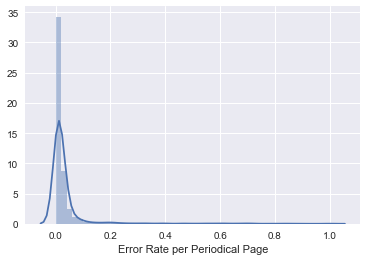

In [29]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [30]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[("'", 1499),
 ('m', 1326),
 ('d', 1254),
 ('e', 998),
 ('w', 956),
 ('t', 837),
 ('n', 776),
 ('r', 682),
 ('f', 633),
 ('g', 384),
 ('x', 271),
 ('u', 206),
 ('k', 192),
 ('tv', 150),
 ('th', 119),
 ('pa', 100),
 ('sunday-law', 92),
 ('z', 83),
 ('ex', 75),
 ('io', 72),
 ('re', 72),
 ('id', 71),
 ('co', 64),
 ('postmaster-general', 62),
 ('mo', 58),
 ('ga', 58),
 ('post-offices', 57),
 ('un-american', 57),
 ('statute-books', 56),
 ('va', 56),
 ('sunday-closing', 54),
 ('church-and-state', 49),
 ('un', 46),
 ('mm', 46),
 ('q', 44),
 ('mt', 42),
 ('attorney-general', 41),
 ('tion', 40),
 ('sunday-rest', 39),
 ('wm', 38),
 ('pp', 38),
 ('charta', 37),
 ('ro', 36),
 ('li', 36),
 ('neander', 31),
 ('-', 30),
 ('seventhday', 30),
 ('mi', 28),
 ('es', 28),
 ('ft', 28)]

## Correction 7 -- Rejoin Split Words II

In [31]:
# %load shared_elements/rejoin_split_words.py
prev = cycle
cycle = "correction7"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)
    
    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    errors = GoH.reports.identify_errors(tokens, spelling_dictionary)

    replacements = GoH.clean.check_if_stem(errors, spelling_dictionary, tokens, get_prior=True)
    
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_split_words(replacement, content)
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

LibM19060401-V01-01-page11.txt: [('de', 'calogue')]
LibM19060401-V01-01-page35.txt: [('en', 'th'), ('d', 'ak'), ('r', 'te')]
LibM19060701-V01-02-page12.txt: [('LIB', 'ERTY')]
LibM19061001-V01-03-page19.txt: [('m', 'es')]
LibM19061001-V01-03-page22.txt: [('bane', 'ful')]
LibM19070101-V02-01-page18.txt: [('IN', 'gress')]
LibM19070101-V02-01-page21.txt: [('W', 'ILLIMANTIC')]
LibM19070101-V02-01-page25.txt: [('r', 'esided')]
LibM19070401-V02-02-page31.txt: [('wine', 'bibbers')]
LibM19070401-V02-02-page36.txt: [('A', 'STI')]
LibM19070701-V02-03-page18.txt: [('WILL', 'IAMS')]
LibM19070701-V02-03-page8.txt: [('LIB', 'ERTY')]
LibM19071001-V02-04-page15.txt: [('rem', 'arkable'), ('n', 'ation')]
LibM19071001-V02-04-page32.txt: [('C', 'hr')]
LibM19071001-V02-04-page51.txt: [('for', 'th'), ('r', 'ow')]
LibM19080101-V03-01-page26.txt: [('PRES', 'IDENT')]
LibM19080101-V03-01-page31.txt: [('Cab', 'inet')]
LibM19080401-V03-02-page28.txt: [('Legis', 'lation')]
LibM19080401-V03-02-page30.txt: [('p', 'ri

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/LibM/correction7

Average verified rate: 0.9815507052480597

Average of error rates: 0.033392883345561265

Total token count: 1451546



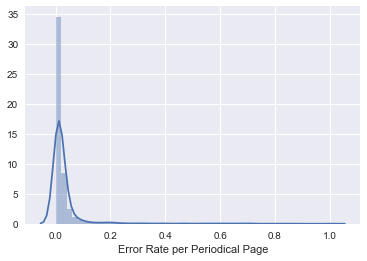

In [32]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [33]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[("'", 1499),
 ('m', 1314),
 ('d', 1253),
 ('e', 997),
 ('w', 951),
 ('t', 835),
 ('n', 774),
 ('r', 677),
 ('f', 631),
 ('g', 383),
 ('x', 271),
 ('u', 206),
 ('k', 192),
 ('tv', 150),
 ('th', 117),
 ('pa', 100),
 ('sunday-law', 92),
 ('z', 82),
 ('ex', 75),
 ('io', 71),
 ('id', 71),
 ('co', 64),
 ('postmaster-general', 62),
 ('re', 59),
 ('mo', 58),
 ('ga', 58),
 ('post-offices', 57),
 ('un-american', 57),
 ('statute-books', 56),
 ('va', 56),
 ('sunday-closing', 54),
 ('church-and-state', 49),
 ('mm', 46),
 ('q', 44),
 ('un', 43),
 ('mt', 42),
 ('attorney-general', 41),
 ('tion', 40),
 ('sunday-rest', 39),
 ('wm', 38),
 ('pp', 38),
 ('charta', 37),
 ('ro', 35),
 ('li', 35),
 ('neander', 31),
 ('-', 30),
 ('seventhday', 30),
 ('mi', 28),
 ('ky', 28),
 ('religio-political', 27)]

## Correction 8 -- Remove Long Tokens with Repeating "m"s

In [34]:
GoH.reports.long_errors(errors_summary, min_length=17)[:50]

(['countermemorialists',
  'immumnitommuummunitimmtwuntnimmummiona',
  'antiprohibitionists',
  'mmierriotitimmiiembitimiimerimiim',
  'vuaziffiemunimeluitennotinutnnifin',
  'nrmomoommomomrsoommommokmagmkwon',
  'iiiwtierttititiiiit',
  'iiimiumiummummimmominimmimmimmimmihmimmiimminimummummimmumummemimmimmimm',
  'church-and-stateunion',
  'iiiirreriiitlhinifid',
  'simmmismwklaiigitil',
  'mimmimmummiiimmimii',
  'iiiiiiiiiiiliiiiiiii',
  'rwiumwimmiiiiimimmumnii',
  'mmmmmmmmmmmmmmmmmns',
  'pilurprmarasigimmt',
  'preventivejurisdiction',
  'miilmilliiimilliifilmidid',
  'enosnantiemotainotientetiemtio',
  'mmozmrommomommonorummanoz',
  'humilffilitiffinummiffiiimminlimmummiiiiiiiiimm',
  'xramoxmozramommommocmommmommx',
  'seventh-day-observing',
  'yffinsmemmmmmmmwmswmmmmmmmnim',
  'ititeiltintonecfctration',
  'migininaugimmikimmu',
  'latitteilommtwtfifolror',
  'mvstimpsmgrecuttliv',
  'iullnnunulnmmuumnuluunnunuumlt',
  'mgraotrtraccommozraglgraccommicami',
  'aommommemsatamm

Remove long tokens with long strings of "m", "i", "l", "x"

In [35]:
# %load shared_elements/remove-tokens-with-long-strings-of-characters.py
prev = "correction7"
cycle = "correction8"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    text = re.sub(r"[0-9,!?$:;&]", " ", content)
    tokens = GoH.utilities.tokenize_text(text)
    
    replacements = []
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "m"))
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "M"))
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "i"))
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "I"))
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "l"))
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "x"))
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "X"))
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "u"))
    replacements.append(GoH.clean.check_for_repeating_characters(tokens, "n"))
    
    replacements = [item for sublist in replacements for item in sublist]
            
    if len(replacements) > 0:
        print('{}: {}'.format(filename, replacements))

        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    else:
        pass
    
    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

LibM19080101-V03-01-page1.txt: [('wimmummtmmuntifiummiummiummmommumwffimmiummummummulmtmminammmmunnummmumummummumummr', ' '), ('JiuWuuWnnWumllonllllllllhIHIIUIIUIHUL', ' ')]
LibM19080401-V03-02-page1.txt: [('ifaimitialiumuumnimimmtmimummuimmunimiummitinimminimmumminummumunnommumminumninummunim', ' '), ('mutummimmomminumummummumunimmiumummummlimummmumumunummtimummimintowitmmummrx', ' '), ('hummmtimmmummummummore', ' '), ('lllllllllllllllllllllllllll', ' '), ('lllllllllllllllll', ' ')]
LibM19080701-V03-03-page1.txt: [('muminatatimiumumuutumitimmittimmummminnumminumuffiummumummunnomiminummuummummimmumnini', ' '), ('Eimmiumiiiiiiimmumummiiimumillimimminimumaniumiffiffimmiummuumniimmommumiummlinmmiumullimmi', ' '), ('MMIMMIMMIMUMMIP', ' '), ('Eimmiumiiiiiiimmumummiiimumillimimminimumaniumiffiffimmiummuumniimmommumiummlinmmiumullimmi', ' ')]
LibM19081001-V03-04-page1.txt: [('flummimmumommifiumwmffimmumnimmimummlimmumimmmunlimmmummmumuummumummlimuummumumumung', ' '), ('MMUMIIMMUMIUMMIMMIIMMII

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/LibM/correction8

Average verified rate: 0.981664985503412

Average of error rates: 0.03307226705796038

Total token count: 1451376



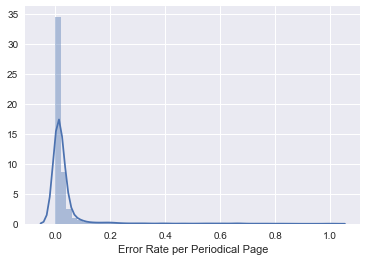

In [36]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [37]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[("'", 1499),
 ('m', 1313),
 ('d', 1253),
 ('e', 997),
 ('w', 951),
 ('t', 834),
 ('n', 773),
 ('r', 677),
 ('f', 631),
 ('g', 383),
 ('x', 271),
 ('u', 206),
 ('k', 192),
 ('tv', 150),
 ('th', 117),
 ('pa', 100),
 ('sunday-law', 92),
 ('z', 82),
 ('ex', 75),
 ('io', 71),
 ('id', 71),
 ('co', 64),
 ('postmaster-general', 62),
 ('re', 59),
 ('ga', 58),
 ('post-offices', 57),
 ('mo', 57),
 ('un-american', 57),
 ('statute-books', 56),
 ('va', 56),
 ('sunday-closing', 54),
 ('church-and-state', 49),
 ('mm', 45),
 ('q', 44),
 ('un', 43),
 ('mt', 42),
 ('attorney-general', 41),
 ('tion', 40),
 ('sunday-rest', 39),
 ('wm', 38),
 ('pp', 38),
 ('charta', 37),
 ('ro', 35),
 ('li', 35),
 ('neander', 31),
 ('-', 30),
 ('seventhday', 30),
 ('mi', 28),
 ('ky', 28),
 ('religio-political', 27)]

In [38]:
GoH.reports.long_errors(errors_summary, min_length=15)

(['countermemorialists',
  'theconstitutionof',
  'well-intentioned',
  'antiprohibitionists',
  'immmotzmotatmtmommzum',
  'sundayobservance',
  'disease-resisting',
  'less-enlightened',
  'vuaziffiemunimeluitennotinutnnifin',
  'cavendish-benand',
  'comizairadtgicao',
  'church-and-stateunion',
  'constitutionalty',
  'california-nevada',
  'winnington-ingram',
  'iiiirreriiitlhinifid',
  'boarding-schools',
  'simmmismwklaiigitil',
  're-establishment',
  'publishing-houses',
  'rwiumwimmiiiiimimmumnii',
  'pilurprmarasigimmt',
  'preventivejurisdiction',
  "religio'political",
  'miilmilliiimilliifilmidid',
  'enosnantiemotainotientetiemtio',
  'one-day-in-seven',
  'elanornelkiiisre',
  'relies-political',
  'narrow-mindedness',
  'harmless-looking',
  'seventh-day-observing',
  'jeradycerelsolid',
  'ititeiltintonecfctration',
  'non-commissioned',
  'migininaugimmikimmu',
  'latitteilommtwtfifolror',
  'mvstimpsmgrecuttliv',
  'mgraotrtraccommozraglgraccommicami',
  'ex-vice-p

## Correction 9 -- Split Squashed Words

In [39]:
# %load shared_elements/separate_squashed_words.py
import pandas as pd
from math import log

prev = cycle
cycle = "correction9"

directories = GoH.utilities.define_directories(prev, cycle, base_dir)
if not os.path.exists(directories['cycle']):
    os.makedirs(directories['cycle'])

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

verified_tokens = []

for filename in corpus:  
    content = GoH.utilities.readfile(directories['prev'], filename)
    GoH.normalize.get_approved_tokens(content, spelling_dictionary, verified_tokens)

tokens_with_freq = dict(collections.Counter(verified_tokens))
words = pd.DataFrame(list(tokens_with_freq.items()), columns=['token','freq'])
words_sorted = words.sort_values('freq', ascending=False)
words_sorted_short = words_sorted[words_sorted.freq > 2]

sorted_list_of_words = list(words_sorted_short['token'])

wordcost = dict((k, log((i+1)*log(len(sorted_list_of_words)))) for i,k in enumerate(sorted_list_of_words))
maxword = max(len(x) for x in sorted_list_of_words)

corpus = (f for f in listdir(directories['prev']) if not f.startswith('.') and isfile(join(directories['prev'], f)))

for filename in corpus:
    content = GoH.utilities.readfile(directories['prev'], filename)

    text = GoH.utilities.strip_punct(content)
    tokens = GoH.utilities.tokenize_text(text)
    
    replacements = []
    
    for token in tokens:
        if not token.lower() in spelling_dictionary:
            if len(token) > 17:
                if re.search(r"[\-\-\'\"]", token):
                    pass
                else:
                    split_string = GoH.normalize.infer_spaces(token, wordcost, maxword)
                    list_split_string = split_string.split()
                    
                    if GoH.normalize.verify_split_string(list_split_string, spelling_dictionary):
                        replacements.append((token, split_string))
                    else:
                        pass
            else:
                pass
        else:
            pass
        
    if len(replacements) > 0:
        print("{}: {}".format(filename, replacements))
        
        for replacement in replacements:
            content = GoH.clean.replace_pair(replacement, content)
    
    else:
        pass

    with open(join(directories['cycle'], filename), mode="w") as o:
        o.write(content)
        o.close()

LibM19080101-V03-01-page22.txt: [('thefactthattheyinvolvethevitalprinciple', 'the fact that they involve the vital principle')]
LibM19080401-V03-02-page22.txt: [('countermemorialists', 'counter memorialists')]
LibM19090101-V04-01-page10.txt: [('satisfactostruction', 'sat is fact o st r u c t i o n')]
LibM19090701-V04-03-page34.txt: [('ffaSSININSONSIWOloolgasers', 'f f a S S I N I N S O N S I W O l o o l g a s e r s')]
LibM19101001-V05-04-page1.txt: [('AffindlitilffilillikVillehd', 'A f f i n d l i t i l f f i l i l l i k V i l l e h d')]
LibM19110401-V06-02-page49.txt: [('msossgmAIAASSMgEAMAKAWMALNARLAA', 'ms o s s g m A I A A S S M g E A M A K A W M A L N A R L A A')]
LibM19111001-V06-04-page18.txt: [('obviouslyagreement', 'obviously agreement')]
LibM19120101-V07-01-page50.txt: [('Toforeigncountries', 'To foreign countries')]
LibM19121001-V07-04-page6.txt: [('tomplonsesolomerol', 'tom p l on s e s o l o m e r o l'), ('IMpreeloreesocoeselaal', 'IM p reel ore e s o c o e s e l a a l'), 

Directory: /Users/jeriwieringa/Dissertation/text/text/2017-01-31-corpus-with-utf8-split-into-titles-cleaning/LibM/correction9

Average verified rate: 0.9815728089947997

Average of error rates: 0.0331019809244314

Total token count: 1452039



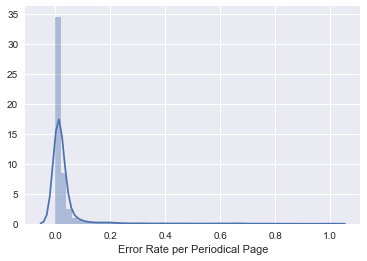

In [40]:
# %load shared_elements/summary.py
summary = GoH.reports.overview_report(directories['cycle'], spelling_dictionary, title)

In [41]:
# %load shared_elements/top_errors.py
errors_summary = GoH.reports.get_errors_summary( summary )
GoH.reports.top_errors( errors_summary, 10 )[:50]

[("'", 1499),
 ('m', 1365),
 ('d', 1261),
 ('e', 1023),
 ('w', 958),
 ('t', 844),
 ('n', 797),
 ('r', 704),
 ('f', 643),
 ('g', 391),
 ('x', 272),
 ('u', 218),
 ('k', 195),
 ('tv', 150),
 ('th', 117),
 ('pa', 100),
 ('sunday-law', 92),
 ('z', 82),
 ('ex', 75),
 ('io', 71),
 ('id', 71),
 ('co', 64),
 ('postmaster-general', 62),
 ('re', 59),
 ('ga', 58),
 ('post-offices', 57),
 ('mo', 57),
 ('un-american', 57),
 ('statute-books', 56),
 ('va', 56),
 ('sunday-closing', 54),
 ('church-and-state', 49),
 ('mm', 45),
 ('q', 44),
 ('un', 43),
 ('mt', 42),
 ('attorney-general', 41),
 ('tion', 40),
 ('sunday-rest', 39),
 ('wm', 38),
 ('pp', 38),
 ('charta', 37),
 ('ro', 35),
 ('li', 35),
 ('neander', 31),
 ('-', 30),
 ('seventhday', 30),
 ('mi', 28),
 ('ky', 28),
 ('religio-political', 27)]

In [42]:
GoH.reports.docs_with_high_error_rate(summary)

[('LibM19200401-V14-02-page4.txt', 1.0),
 ('LibM19060401-V01-01-page2.txt', 1.0),
 ('LibM19140701-V09-03-page52.txt', 0.857),
 ('LibM19110701-V06-03-page1.txt', 0.824),
 ('LibM19080101-V03-01-page1.txt', 0.812),
 ('LibM19090401-V04-02-page33.txt', 0.778),
 ('LibM19110101-V06-01-page1.txt', 0.769),
 ('LibM19191001-V15-04-page28.txt', 0.75),
 ('LibM19110701-V06-03-page4.txt', 0.729),
 ('LibM19080401-V03-02-page19.txt', 0.714),
 ('LibM19080701-V03-03-page1.txt', 0.687),
 ('LibM19100101-V05-01-page1.txt', 0.676),
 ('LibM19111001-V06-04-page1.txt', 0.667),
 ('LibM19090401-V04-02-page1.txt', 0.667),
 ('LibM19110401-V06-02-page1.txt', 0.662),
 ('LibM19081001-V03-04-page1.txt', 0.66),
 ('LibM19080401-V03-02-page1.txt', 0.659),
 ('LibM19130701-V08-03-page2.txt', 0.657),
 ('LibM19100401-V05-02-page1.txt', 0.645),
 ('LibM19080701-V03-03-page41.txt', 0.619),
 ('LibM19100701-V05-03-page1.txt', 0.615),
 ('LibM19140401-V09-02-page1.txt', 0.611),
 ('LibM19120701-V07-03-page4.txt', 0.605),
 ('LibM19090

In [43]:
# %load shared_elements/high_error_rates.py
doc_keys = [x[0] for x in GoH.reports.docs_with_high_error_rate(summary) if x[1] > 0.5]

# GoH.utilities.open_original_docs(doc_keys, directories['cycle'])